<a href="https://colab.research.google.com/github/sankar-mechengg/Titanic-Survival-Prediction-using-Classficiation/blob/master/Titanic_Disaster_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Diaster Prediction

## Data Pre-processing

In [ ]:
# Load Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load Dataset
df_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset/Titanic_train_dataset.csv')
df_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset/Titanic_test_dataset.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Remove unnecessary columns
df_train.drop('PassengerId', axis=1, inplace=True)
df_train.drop('Name', axis=1, inplace=True)
df_train.drop('Ticket', axis=1, inplace=True)

df_test.drop('PassengerId', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
#Fill Missing Values in Age Column
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

In [ ]:
#Split the alphabet and numbers in the Cabin Column
df_train['Cabin'] = df_train['Cabin'].str[:1]
df_test['Cabin'] = df_test['Cabin'].str[:1]

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
# Print the single values in column cabin
print(df_train['Cabin'].unique())

#Assign H to the missing cells in Cabin Column
df_train['Cabin'].fillna('H', inplace=True)
df_test['Cabin'].fillna('H', inplace=True)

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [ ]:
# Data Preprocessing
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

df_train.head()

<ipython-input-50-3eea10f430ae>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.fillna(df_train.mean(), inplace=True)
<ipython-input-50-3eea10f430ae>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test.fillna(df_test.mean(), inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,H,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,H,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,H,S


In [ ]:
# Do Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Cabin'] = le.fit_transform(df_train['Cabin'])
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])

df_test['Cabin'] = le.fit_transform(df_test['Cabin'])
df_test['Sex'] = le.fit_transform(df_test['Sex'])
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])

print(df_train['Cabin'].unique())

print(df_train.head())
print(df_test.head())

[7 2 4 6 3 0 1 5 8]
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0         0       3    1  22.0      1      0   7.2500      7         2
1         1       1    0  38.0      1      0  71.2833      2         0
2         1       3    0  26.0      0      0   7.9250      7         2
3         1       1    0  35.0      1      0  53.1000      2         2
4         0       3    1  35.0      0      0   8.0500      7         2
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0         0       3    1  34.5      0      0   7.8292      7         1
1         1       3    0  47.0      1      0   7.0000      7         2
2         0       2    1  62.0      0      0   9.6875      7         1
3         0       3    1  27.0      0      0   8.6625      7         2
4         1       3    0  22.0      1      1  12.2875      7         2


In [ ]:
# Calculate the number of male and female passengers those who are survived
df_train['Survived'].value_counts()
df_train[df_train['Survived'] == 1]['Sex'].value_counts()
df_train[df_train['Survived'] == 0]['Sex'].value_counts()

1    468
0     81
Name: Sex, dtype: int64

## Data Visualization

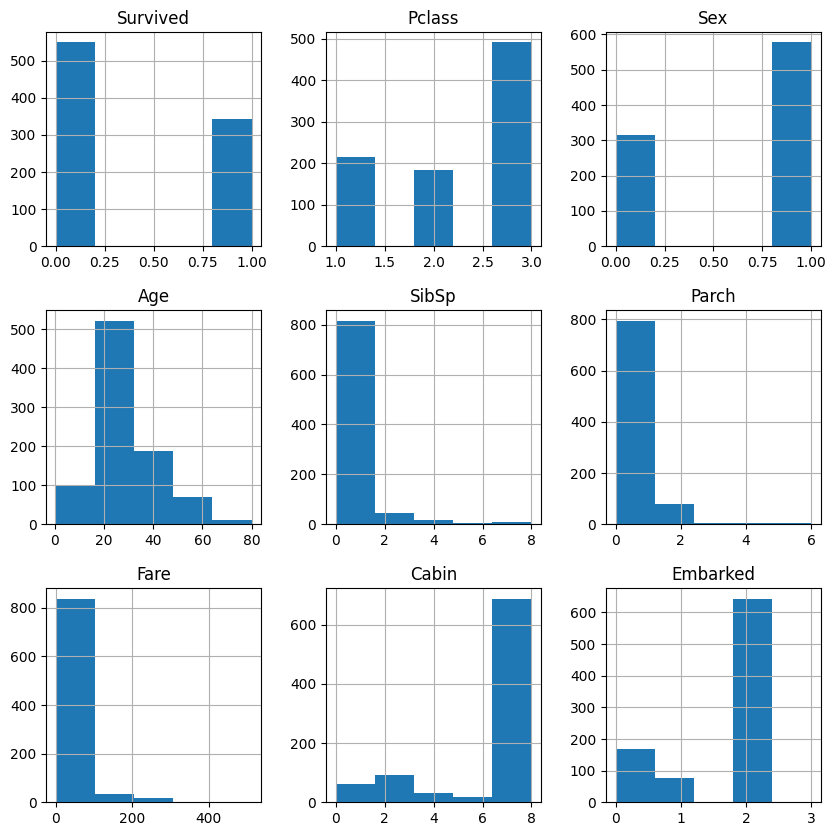

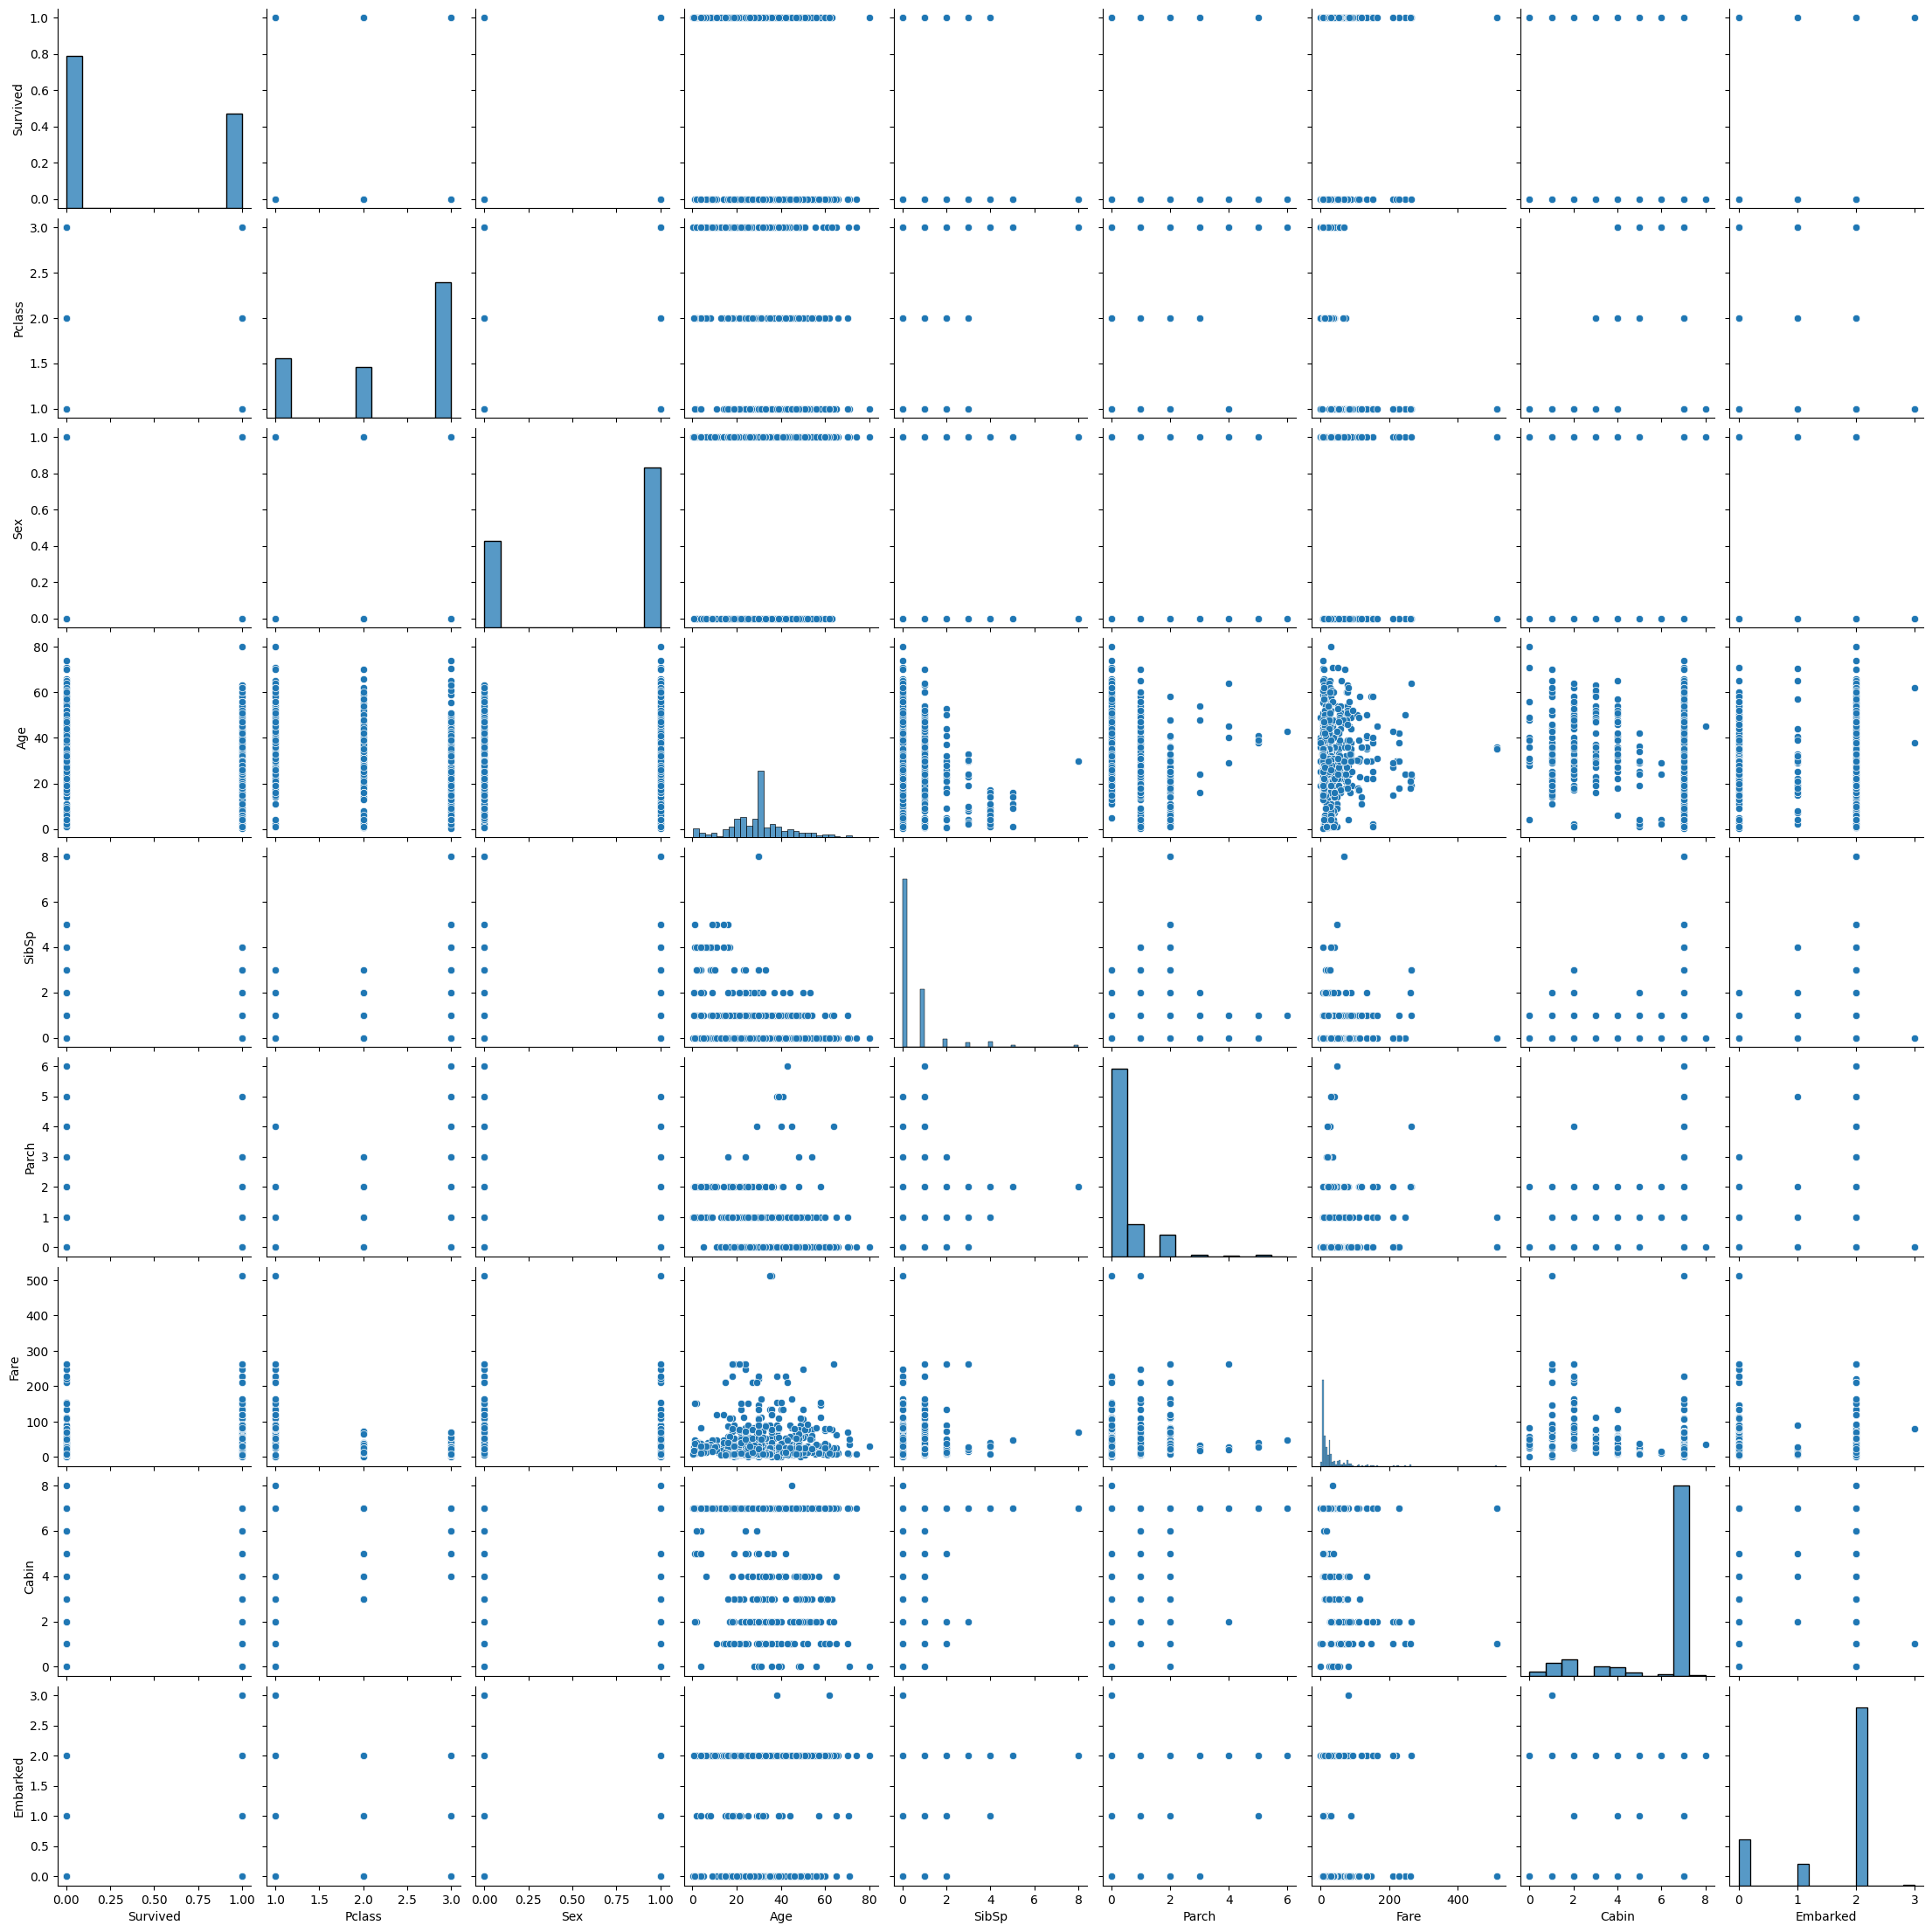

In [ ]:
# Visualize the Dataset
# plot the histogram in subplots
df_train.hist(bins=5, figsize=(10,10))

import seaborn as sns
# Visualize the Dataset
sns.pairplot(df_train)

## Classification

### Logistic Regression

In [ ]:
#Assign the target variable
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

X_test = df_test.drop('Survived', axis=1)
y_test = df_test['Survived']

In [ ]:
# Model Training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cholesky', max_iter=100000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000, solver='newton-cholesky')

https://neptune.ai/blog/saving-trained-model-in-python

In [ ]:
## Save the model
#Method 1 as Pickle File
import pickle
pickle.dump(model, open('gdrive/MyDrive/Colab Notebooks/Saved ML Models/Titanic_Disaster_LogisticRegression.pkl', 'wb'))

#Method 2 as joblib
import joblib
joblib.dump(model, 'gdrive/MyDrive/Colab Notebooks/Saved ML Models/Titanic_Disaster_LogisticRegression.sav')

#Method 3 as HDF5
import h5py
h5f = h5py.File('gdrive/MyDrive/Colab Notebooks/Saved ML Models/Titanic_Disaster_LogisticRegression.h5', 'w')

In [ ]:
# Model Training and Testing Scores
Training_Score = model.score(X_train, y_train)
print(Training_Score)

Test_Score = model.score(X_test, y_test)
print(Test_Score)

y_pred = model.predict(X_test)
print(y_pred)

0.7946127946127947
0.9330143540669856
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


[[249  17]
 [ 11 141]]


<Axes: >

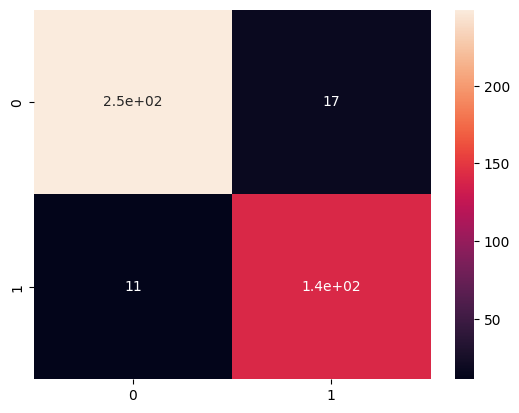

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Visualize the Confusion Matrix
import seaborn as sns
sns.heatmap(cm, annot=True)

### Decision Tree

In [ ]:
# Model Training
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
# Model Training and Testing Scores
Training_Score = model.score(X_train, y_train)
print(Training_Score)

Test_Score = model.score(X_test, y_test)
print(Test_Score)

y_pred = model.predict(X_test)
print(y_pred)

0.9865319865319865
0.7535885167464115
[0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0
 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 0 0 1 0 1 0 0 1 0 0 1]


[[212  54]
 [ 49 103]]


<Axes: >

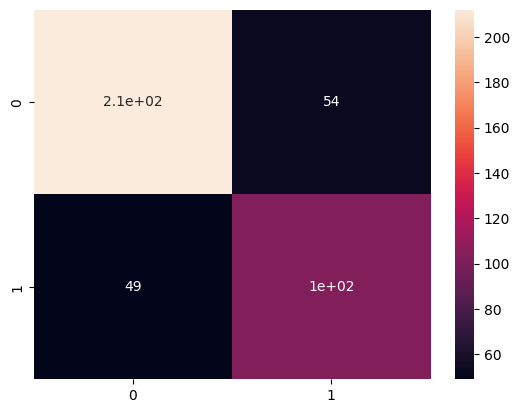

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Visualize the Confusion Matrix
import seaborn as sns
sns.heatmap(cm, annot=True)

### Random Forest

In [ ]:
# Model Training
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Model Training and Testing Scores
Training_Score = model.score(X_train, y_train)
print(Training_Score)

Test_Score = model.score(X_test, y_test)
print(Test_Score)

y_pred = model.predict(X_test)
print(y_pred)

0.9865319865319865
0.7751196172248804
[0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 0 1 0 1 0 0 1 0 0 1]


[[221  45]
 [ 49 103]]


<Axes: >

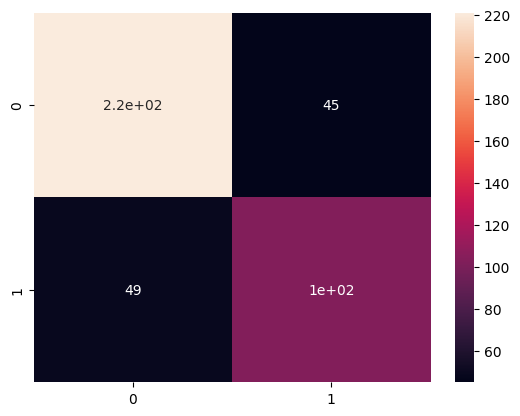

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Visualize the Confusion Matrix
import seaborn as sns
sns.heatmap(cm, annot=True)